# Emotions Multiclass Classification

### Probleem
In deze data set zitten zo'n 400.000 Twitter berichten, met hun gelabelde emotie erbij. Het is dus een string met woorden, en een cijfer 0-5: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

Het doel is dus om een model te maken, die dus kan voorspellen, aan de hang van een tweet, welke emotie er bij hoort.

### Voorspelling
Ik denk dat ik met een multiclass model een best goed model kan maken. Dit denk ik omdat de data heel erg netjes, en best simpel is. Ook heb ik een hele grote data set wat misschien zijn voordelen of nadelen kan hebben.

# Visualizing the Data

In [2]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import ast

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_4396\1098269819.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# reading the data
data = pd.read_csv('text.csv')

# checking the data
data.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


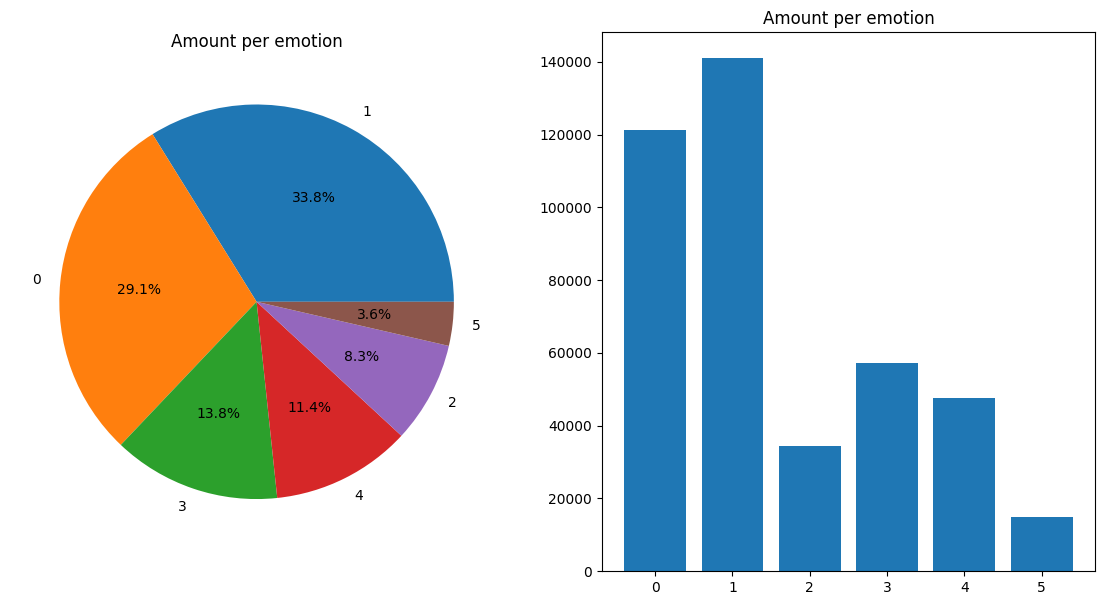

In [4]:
# Visualizing the amount per emotion
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].pie(data['label'].value_counts(), labels=data['label'].value_counts().index, autopct='%1.1f%%')
axs[0].set_title('Amount per emotion')
axs[1].bar(data['label'].value_counts().index, data['label'].value_counts())
axs[1].set_title('Amount per emotion')

# pie chart
plt.show()

Wat hier opvalt, is dat de meeste tweets in deze dataset voor Joy zijn, met Sadness dicht in de buurt.

Blijkbaar tweeten mensen vaak hun emoties als ze heel blij zijn, of juist heel zielig.

# Cleaning the Data

In [5]:
# Removing lower case
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


Door alle tekst naar kleine letters te converteren, zorg je ervoor dat je model "Hallo", "hallo" en "HALLO" als dezelfde term herkent. Dit helpt om de grootte van de woordenschat van het model te verminderen en maakt het model minder gevoelig voor variaties in de manier waarop de tekst wordt ingevoerd.

In [6]:
# Removing non-alphabetic characters
data['text'] = data['text'].apply(lambda x: ''.join([i for i in x if i.isalpha() or i == ' ']))
data.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


Niet-alfabetische karakters (zoals cijfers of speciale tekens) kunnen ruis in je data introduceren, vooral als ze niet relevant zijn voor de taak die je probeert uit te voeren. Door ze te verwijderen, verminder je de complexiteit van je data en maak je het makkelijker voor je model om relevante patronen te leren.

In [7]:
# Removing punctuation and special characters
data['text'] = data['text'].str.replace(r'[^\w\s]', '', regex=True)
data.head()


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


Net als niet-alfabetische karakters kunnen leestekens en speciale tekens ruis introduceren. Bovendien kunnen sommige modellen ze verwarren met operationele tekens (zoals "+" in een wiskundige uitdrukking). Door ze te verwijderen, verminder je de kans op dergelijke verwarring.

In [8]:
# Removing stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,text,label
0,0,feel really helpless heavy hearted,4
1,1,ive enjoyed able slouch relax unwind frankly n...,0
2,2,gave internship dmrg feeling distraught,4
3,3,dont know feel lost,0
4,4,kindergarten teacher thoroughly weary job take...,4


Stopwoorden zijn veelvoorkomende woorden zoals "de", "het", "een", "en", die meestal weinig betekenisvolle informatie dragen. Door ze te verwijderen, kun je je model helpen zich te concentreren op de belangrijkste woorden in de tekst.

In [9]:
# Train test split
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the tokenizer with a specific number of words to keep
tokenizer = Tokenizer(num_words=50000)

# Fit the tokenizer on your texts
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

# Convert your texts into sequences of integers
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Get the length of the sequences
maxlen = max([len(x) for x in X_train_sequences])
print("Maximum length of sequences:", maxlen)



Maximum length of sequences: 79


Machine learning modellen kunnen niet direct werken met ruwe tekst. Ze vereisen numerieke input. Tokenisatie is het proces van het omzetten van ruwe tekst in een numerieke vorm die kan worden begrepen door een model. Door elke unieke term in de tekst om te zetten in een uniek getal, zorgt tokenisatie ervoor dat dezelfde term altijd op dezelfde manier wordt vertegenwoordigd, ongeacht waar het in de tekst voorkomt. Tokenisatie helpt om de complexiteit van de tekst te verminderen door deze te splitsen in kleinere eenheden (tokens). Dit maakt het makkelijker voor het model om patronen in de tekst te herkennen.

In [11]:
# Pad the sequences so each sequence is the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=maxlen)

# Print the shapes of the padded data
print(X_train_padded)
print(X_test_padded)

[[   16 30400    69 ...     0     0     0]
 [  268     5   723 ...     0     0     0]
 [    1    44   721 ...     0     0     0]
 ...
 [    1   591     0 ...     0     0     0]
 [    4    15   473 ...     0     0     0]
 [    1   147  1739 ...     0     0     0]]
[[  120    39   169 ...     0     0     0]
 [ 3034 14469   785 ...     0     0     0]
 [  188   303    48 ...     0     0     0]
 ...
 [  841   271  1955 ...     0     0     0]
 [ 1907  7255   634 ...     0     0     0]
 [   82     1   400 ...     0     0     0]]


Machine learning modellen vereisen dat alle input in een uniforme vorm is. Dat betekent dat elke invoer dezelfde lengte moet hebben. Maar als we een reeks teksten tokeniseren, krijgen we waarschijnlijk sequenties van verschillende lengtes, omdat de teksten niet allemaal even lang zijn. Padding is het proces van het toevoegen van nullen (of een ander "vul" getal) aan de kortere sequenties om ervoor te zorgen dat ze allemaal dezelfde lengte hebben. In tegenstelling tot sommige andere types van data, is de volgorde van de elementen in een tekst belangrijk. Door padding te gebruiken, kunnen we ervoor zorgen dat deze volgorde-informatie behouden blijft wanneer we de tekst in ons model invoeren.



# Training and testing the model

In [12]:
# Multi-class classification model
from sklearn.ensemble import RandomForestClassifier


# Initialize the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train_padded, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test_padded)

# Print the accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.422554641203426


Hier heb ik gekozen voor een Random Forst Classifier. Random Forests kunnen zowel voor classificatie- als regressieproblemen worden gebruikt. Ze kunnen omgaan met zowel categorische als numerieke gegevens. Door het bouwen van meerdere bomen en het gemiddelden van hun voorspellingen, kunnen Random Forests overfitting verminderen, wat een veelvoorkomend probleem is bij enkele beslissingsbomen. Random Forests kunnen goed omgaan met datasets waarin de klassen ongelijk verdeeld zijn.

Daarom past het perfect op deze dataset.

Het resultaat van het model is 42%, wat heel erg laag is. Waarschijnlijk komt het omdat het model niet lang genoeg traint op de data set, aangezien het maar 2 minuten duurde toen hij klaar was. Voor zo'n grote dataset, is dat te kort.


# Improve

In [18]:
# Initialize the RandomForest model
model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=300, criterion='gini')

# Fit the model on the training data
model.fit(X_train_padded, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test_padded)

# Print the accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.42868453252081284


In [19]:
# Initialize the RandomForest model
model = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=300, criterion='gini')

# Fit the model on the training data
model.fit(X_train_padded, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test_padded)

# Print the accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4297161776348936


In deze 2 modelen, heb ik de max_depth en n_estimators aangepast. n_estimators beinvloed de hoeveelheid bomen in de tree. Terwijl max_depth de diepe van de bomen beinvloed.

Het model presteert niet veel beter dan het eerste model. Weinig is er veranderd.

In [21]:
from sklearn import svm
from sklearn import metrics

# Initialize the SVM model
model = svm.SVC(kernel='linear')

# Fit the model on the training data
model.fit(X_train_padded, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test_padded)

# Print the accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Evaluate

Ik heb een poging gedaan om een andere modellen te gebruiken, maar het duurde allemaal te lang. 1 model had ik zelfs laten draaien voor 5 uur.

Het is mij daarom ook niet gelukt om mijn model te verbeteren. Misschien zou een NN model beter presteren met deze data set, maar ik weet nou niet zeker of dat de bedoeling is van deze opdracht.